## Final Project Submission

Please fill out:
* Student name: Joshua Thomas
* Student pace: self paced / *part time* / full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


### Importing the Required Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import quickfunctions as qf
from sklearn.model_selection import train_test_split #Split the data into test/train portions and fit model to smaller sample

### Load the dataset and perform initial analysis
In this dataset, there are 20 different columns (potential features) to build a model from.

In [2]:
housing_data = pd.read_csv('kc_house_data.csv')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Quick Notes on Data Set
* Waterfront has some NaN and zero values, will want to convert these to binary values.
* May want to drop lat/long when building the model.
* See if there is a data dictionary for this data set.
* May want transform zipcode into categorical data type.

* Will want to categorize 'condition, grade, floors' columns. 
* May want to categorize Year Column into different decades.
* Will want to convert sqft_basement to float
* Will want to convert any column that doens't necessarily need to be a float to an integer
* Drop ID's in data set to avoid skewing model.
* There are some columns that are of the 'object' data type. Cast these appropriately
* Convert appropriate values to integers

In [4]:
housing_data.info()
# housing_data.drop('id', axis=1, inplace=True) #Column has been dropped. Reimport data if needed again.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


* For the Waterfront Column, set NaN values to zero to signify that there is no water front.
* For View, also set NaN columns equal to zero.
    * Can accomplish this using _pd.fillna()_ or writing for loop to iterate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A13EEB6A0>,
      dtype=object)

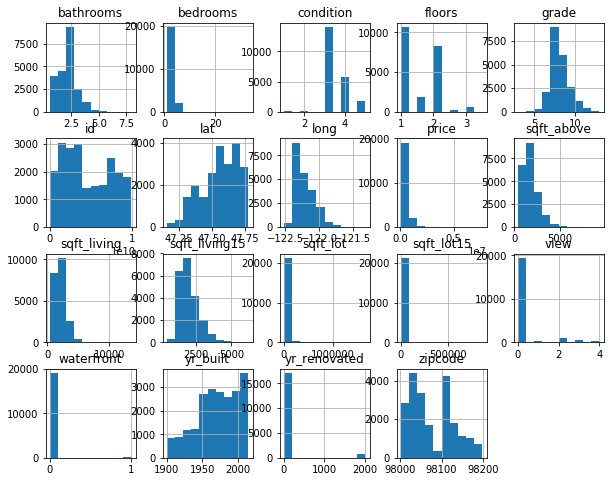

In [5]:
features = housing_data.columns
housing_data[features].hist(figsize=(10,8), layout=(4,5))

### Cleaning the Data
Start with evaluating which variables can be transformed into categorical
* Converted Waterfront and Grade.
* Working to use this data for modeling a general price estimate of houses given the features.
* Filling Waterfront, view NaN's with zeros 

In [6]:
housing_data['waterfront'].fillna(0, inplace=True)
housing_data['view'].fillna(0, inplace=True)
housing_data['price'] = housing_data['price'].astype(int)

waterfront_cat = pd.get_dummies(housing_data['waterfront'], prefix='waterfront')
view_cat = pd.get_dummies(housing_data['view'], prefix='view')
grade_cat = pd.get_dummies(housing_data['grade'], prefix='grade')
bath_cat = pd.get_dummies(housing_data['bathrooms'], prefix='bath')
floors_cat = pd.get_dummies(housing_data['floors'], prefix='floor')
bed_cat = pd.get_dummies(housing_data['bedrooms'], prefix='bed')
zip_cat = pd.get_dummies(housing_data['zipcode'], prefix='zip')
cond_cat = pd.get_dummies(housing_data['condition'], prefix='cond')
yr_cat = pd.get_dummies(housing_data['yr_built'], prefix='yr')

housing_data = pd.concat([housing_data, waterfront_cat, grade_cat, view_cat, bath_cat, floors_cat, bed_cat, zip_cat, cond_cat], axis=1)
housing_data.set_index(keys='id')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,cond_1,cond_2,cond_3,cond_4,cond_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,1,0,0,0,0,0,1,0,0
6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,0,0,0,0,0,0,0,1
1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0,0,0,1,0,0,0,1,0,0
2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0


### Scaling and Normalizing Features
Features to Scale/Normalize: Sq.Ft, Price

In [7]:
scaled_price = np.log(housing_data['price'])
price = housing_data['price']
scaled_living = np.log(housing_data['sqft_living'])
scaled_lot = np.log(housing_data['sqft_lot'])
scaled_above = np.log(housing_data['sqft_above'])

### Taking a look at correlation
* Checking which features have high correlation, looking specifically in my case at the price column for modeling
* Write function to automatically return true values
* Function to get correlations is built in QuickFuncs package/module

### Extracting Price-related Features
* Extracted highly correlated variables
* Check distrbutions of features
* Check for multicollinearity in features
* See if any features need to be adjusted.

In [8]:
features = pd.DataFrame([], index=[])
features['scaled_living'] = scaled_living
features['scaled_lot'] = scaled_lot
features = pd.concat([features, zip_cat, waterfront_cat, yr_cat, cond_cat], axis=1)
#Normalize/Scale features for prices
#Grades need to be turned in to Categorical Variable
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 195 entries, scaled_living to cond_5
dtypes: float64(2), uint8(193)
memory usage: 4.3 MB


### Begin Modeling Data

In [9]:
features_const = sm.add_constant(features)
model = sm.OLS(scaled_price, features_const).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     644.9
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        14:44:03   Log-Likelihood:                 3835.3
No. Observations:               21597   AIC:                            -7287.
Df Residuals:                   21405   BIC:                            -5754.
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4346      0.019    229.006      0.000       4.397       4.473
scaled_living      0.6293      0.004    144.631      0.000       0.621       0.638
scaled_lot         0.1044      0.002     44.220      0.000       0.100       0.109
zip_98001         -0.4785      0.011    -44.374      0.000      -0.500      -0.457
zip_98002         -0.4985      0.014    -34.545      0.000      -0.527      -0.470
zip_98003         -0.3942      0.012    -32.248      0.000      -0.418      -0.370
zip_98004          0.7977      0.012     68.493      0.000       0.775       0.821
zip_98005          0.3899      0.016     24.667      0.000       0.359       0.421
zip_98006          0.3369      0.009     35.870      0.000       0.318       0.355
zip_98007          0.2888      0.017     16.802      0.000       0.255       0.323
zip_98008          0.2951      0.012     23.840      0.000       0.271       0.319
zip_98010         -0.2772      0.020    -13.548      0.000      -0.317      -0.237
zip_98011          0.0191      0.015      1.315      0.189      -0.009       0.048
zip_98014         -0.2242      0.019    -12.089      0.000      -0.261      -0.188
zip_98019         -0.2027      0.015    -13.601      0.000      -0.232      -0.173
zip_98022         -0.4279      0.014    -31.492      0.000      -0.455      -0.401
zip_98023         -0.4382      0.009    -46.989      0.000      -0.456      -0.420
zip_98024         -0.0844      0.023     -3.683      0.000      -0.129      -0.040
zip_98027          0.0883      0.010      8.666      0.000       0.068       0.108
zip_98028         -0.0201      0.012     -1.659      0.097      -0.044       0.004
zip_98029          0.2149      0.012     18.487      0.000       0.192       0.238
zip_98030         -0.4247      0.013    -33.288      0.000      -0.450      -0.400
zip_98031         -0.3804      0.012    -30.664      0.000      -0.405      -0.356
zip_98032         -0.4417      0.018    -24.306      0.000      -0.477      -0.406
zip_98033          0.4070      0.010     41.262      0.000       0.388       0.426
zip_98034          0.1417      0.009     15.707      0.000       0.124       0.159
zip_98038         -0.3259      0.009    -37.302      0.000      -0.343      -0.309
zip_98039          1.0368      0.029     36.232      0.000       0.981       1.093
zip_98040          0.6065      0.012     49.114      0.000       0.582       0.631
zip_98042         -0.4007      0.009    -44.626      0.000      -0.418      -0.383
zip_98045         -0.1621      0.014    -11.602      0.000      -0.189      -0.135
zip_98052          0.2435      0.009     27.922      0.000       0.226       0.261
zip_98053          0.1243      0.011     11.786      0.000       0.104       0.145
zip_98055         -0.2940      0.012    -23.666      0.000      -0.318      -0.270
zip_98056   

## Visualizing Important Features for Price Prediction Model

In [85]:
# #5 Most Expensive Zip Code??
# #Average cost per house condition?
zip_count = pd.Series(list(housing_data[zip_cat.columns].sum()), name='count')
zip_count
#Extracting home count per zip code. Order is preserved from categorical casting

0     361
1     199
2     280
3     317
4     168
5     498
6     141
7     283
8     100
9     195
10    124
11    190
12    233
13    499
14     80
15    412
16    283
17    321
18    256
19    273
20    125
21    432
22    545
23    589
24     50
25    282
26    547
27    220
28    574
29    403
     ... 
40    351
41    104
42    602
43    229
44    335
45    266
46    186
47    109
48    269
49    583
50    330
51    553
52    507
53    184
54    290
55    409
56    354
57    493
58    263
59    343
60    288
61     57
62    446
63    254
64    269
65    255
66    262
67    136
68    280
69    317
Name: count, Length: 70, dtype: int64

In [86]:
zip_price = pd.DataFrame(housing_data.groupby('zipcode')['price'].mean().astype(int))
zip_price.reset_index(inplace=True) #Took a couple hours to fix this.... 
pd.concat([zip_price,zip_count], axis=1)

,zipcode,price,count
0,98001,281194,361
1,98002,234284,199
2,98003,294111,280
3,98004,1356523,317
4,98005,810289,168
5,98006,859938,498
6,98007,617254,141
7,98008,645628,283
8,98010,423665,100
9,98011,490377,195
